In [2]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [3]:
df_cctv = pd.read_csv('./data/opengov_2018_seoul_cctv_status_by_year.csv',  encoding='utf-8')
df_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
df_pop_seoul = pd.read_excel('./data/Report_seoul_population_2018_3Q.xls',  encoding='utf-8')
df_pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.3/4,합계,4254018,10068381,4922959,5145422,9793003,4789821,5003182,275378,133138,142240,2.3,1405404
3,2018.3/4,종로구,73696,163086,79301,83785,153396,75024,78372,9690,4277,5413,2.08,26622
4,2018.3/4,중구,61232,135258,66554,68704,125815,62063,63752,9443,4491,4952,2.05,21902


In [5]:
population = pd.read_excel('./data/Report_seoul_population_2018_3Q.xls', 
                     header = 2,
                     usecols = "B, C, D, G, J, N",
                     encoding = "utf-8"
                    )
population.head()

,자치구,세대,계,계.1,계.2,65세이상고령자
0,합계,4254018,10068381,9793003,275378,1405404
1,종로구,73696,163086,153396,9690,26622
2,중구,61232,135258,125815,9443,21902
3,용산구,108777,245087,229391,15696,37443
4,성동구,136831,317197,309251,7946,42581


In [6]:
df_cctv.rename(columns={df_cctv.columns[0] : '구'}, inplace=True)
df_cctv.rename(columns={df_cctv.columns[1] : 'CCTV수'}, inplace=True)
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [7]:
population.rename(columns={population.columns[0] : '구', 
                           population.columns[1] : '세대수', 
                           population.columns[2] : '인구수', 
                           population.columns[3] : '한국인', 
                           population.columns[4] : '외국인', 
                           population.columns[5] : '고령자'}, inplace=True)
population.head()

,구,세대수,인구수,한국인,외국인,고령자
0,합계,4254018,10068381,9793003,275378,1405404
1,종로구,73696,163086,153396,9690,26622
2,중구,61232,135258,125815,9443,21902
3,용산구,108777,245087,229391,15696,37443
4,성동구,136831,317197,309251,7946,42581


# 1단계, cctv 데이터 파악

In [8]:
df_cctv.sort_values(by='CCTV수', ascending=True).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109
12,마포구,980,314,118,169,379
1,강동구,1010,379,99,155,377
23,중구,1023,413,190,72,348
17,송파구,1081,529,21,68,463
13,서대문구,1254,844,50,68,292


In [9]:
df_cctv.sort_values(by='CCTV수', ascending=False).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468
20,용산구,2096,1368,218,112,398
6,구로구,1884,1142,173,246,323
10,동대문구,1870,1070,23,198,579
16,성북구,1651,1009,78,360,204
22,종로구,1619,464,314,211,630


In [10]:
df_cctv['최근증가율'] = (df_cctv['2016년'] + df_cctv['2015년'] + df_cctv['2014년']) / df_cctv['2013년도 이전']  * 100
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [11]:
df_cctv.sort_values(by='최근증가율', ascending=False).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


# 2단계. 서울시 인구 데이터 파악

In [12]:
population.drop([0], inplace=True)
population.head()

,구,세대수,인구수,한국인,외국인,고령자
1,종로구,73696,163086,153396,9690,26622
2,중구,61232,135258,125815,9443,21902
3,용산구,108777,245087,229391,15696,37443
4,성동구,136831,317197,309251,7946,42581
5,광진구,161714,369999,355032,14967,45202


In [13]:
population['구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [14]:
population['외국인비율'] = population['외국인'] / population['인구수'] * 100
population['고령자비율'] = population['고령자'] / population['인구수'] * 100
population.head()

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,73696,163086,153396,9690,26622,5.941650,16.323903
2,중구,61232,135258,125815,9443,21902,6.981472,16.192758
3,용산구,108777,245087,229391,15696,37443,6.404256,15.277432
4,성동구,136831,317197,309251,7946,42581,2.505068,13.424150
5,광진구,161714,369999,355032,14967,45202,4.045146,12.216790


In [15]:
population.sort_values(by='인구수', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,269558,673582,666892,6690,80220,0.993198,11.909463
16,강서구,257558,605068,598416,6652,78814,1.099381,13.025643
11,노원구,217900,551069,546911,4158,76466,0.754533,13.875939
23,강남구,228883,549255,544257,4998,66412,0.909960,12.091287
21,관악구,261401,521685,503956,17729,71840,3.398411,13.770762
12,은평구,203951,487849,483417,4432,76643,0.908478,15.710394
15,양천구,176598,469945,466121,3824,57442,0.813712,12.223132
8,성북구,186744,449574,438031,11543,67447,2.567542,15.002425
22,서초구,173912,441539,437407,4132,54887,0.935818,12.430838
17,구로구,172121,439234,406144,33090,61293,7.533570,13.954521


In [16]:
population.sort_values(by='고령자비율', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,143172,324276,320576,3700,57741,1.141003,17.806128
1,종로구,73696,163086,153396,9690,26622,5.941650,16.323903
2,중구,61232,135258,125815,9443,21902,6.981472,16.192758
10,도봉구,137901,342990,340876,2114,55499,0.616344,16.180938
12,은평구,203951,487849,483417,4432,76643,0.908478,15.710394
6,동대문구,162232,366101,350556,15545,57096,4.246096,15.595696
13,서대문구,138027,322497,310584,11913,50278,3.693988,15.590223
3,용산구,108777,245087,229391,15696,37443,6.404256,15.277432
8,성북구,186744,449574,438031,11543,67447,2.567542,15.002425
7,중랑구,180044,409058,404313,4745,61271,1.159982,14.978560


# Tip. DataFrame 병합

In [17]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [18]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [19]:
result = pd.concat([df1, df2, df3])    # default axis=0
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [20]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [21]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [22]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [23]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [24]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [25]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [26]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [27]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [28]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [29]:
result = pd.concat([df1, df4], ignore_index=True)
result

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [30]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})


In [31]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [32]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [33]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [34]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [35]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 3단계. CCTV 데이터와 인구 데이터 합치고 분석

In [36]:
data_result = pd.merge(df_cctv, population, on='구')
data_result.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
1,강동구,1010,379,99,155,377,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948
2,강북구,831,369,120,138,204,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128
3,강서구,911,388,258,184,81,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643
4,관악구,2109,846,260,390,613,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762


In [37]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
1,강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948
2,강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128
3,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643
4,관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762


In [38]:
data_result.set_index('구', inplace=True)
data_result.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762


# 상관 분석(correlation analysis)

In [39]:
np.corrcoef(data_result['고령자비율'],data_result['CCTV수'])

array([[ 1.        , -0.27533083],
       [-0.27533083,  1.        ]])

In [40]:
np.corrcoef(data_result['외국인비율'],data_result['CCTV수'])

array([[ 1.        , -0.04796912],
       [-0.04796912,  1.        ]])

In [41]:
data_result.sort_values(by='CCTV수', ascending=False).head(10)


,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762
은평구,2108,85.237258,203951,487849,483417,4432,76643,0.908478,15.710394
용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432
구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521
동대문구,1870,74.766355,162232,366101,350556,15545,57096,4.246096,15.595696
성북구,1651,63.627354,186744,449574,438031,11543,67447,2.567542,15.002425


# 4단계. CCTV와 인구현황 그래프로 분석

In [42]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

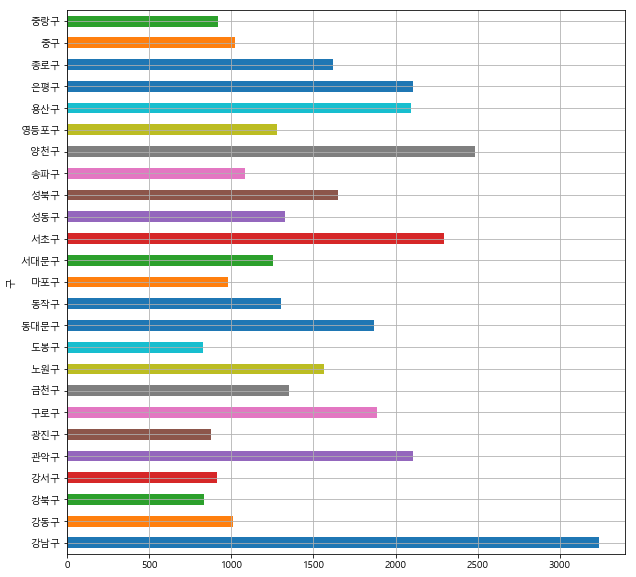

In [43]:
plt.figure()
data_result['CCTV수'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

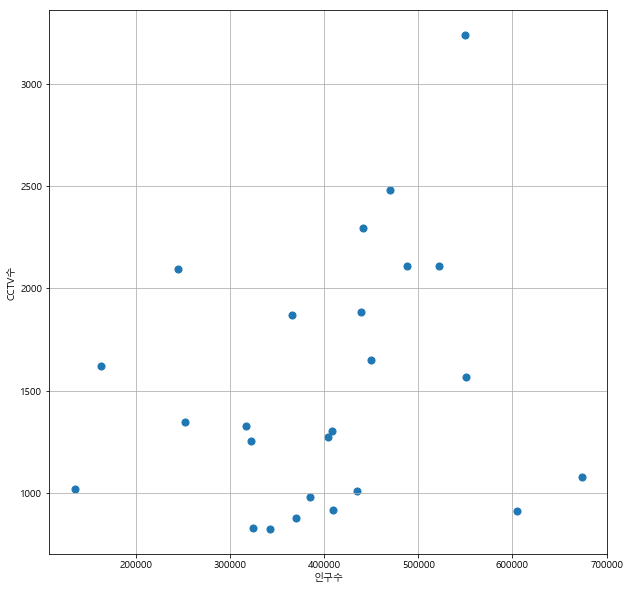

In [44]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()

In [45]:
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV수'], 1)
fp1

array([1.08180882e-03, 1.07963746e+03])

In [46]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

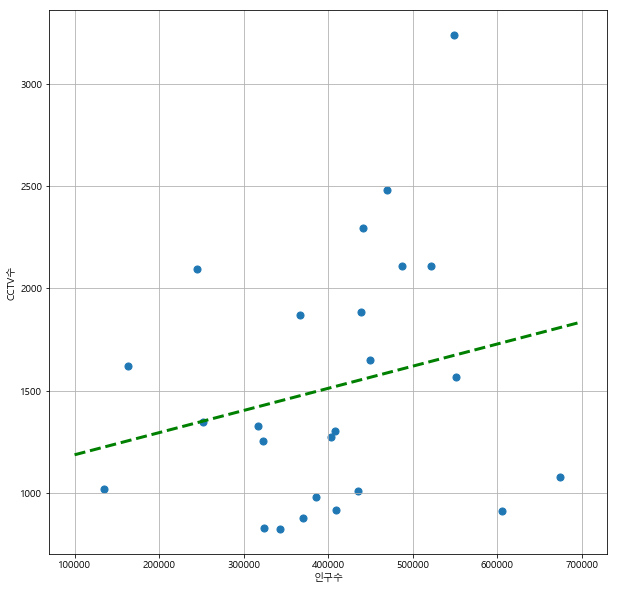

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()

# 5단계. 그래프에 의미 부여 

In [54]:
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV수'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['CCTV수'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구,,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,1564.173631
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,893.971889
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,823.205365
용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,751.225257
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,739.701750


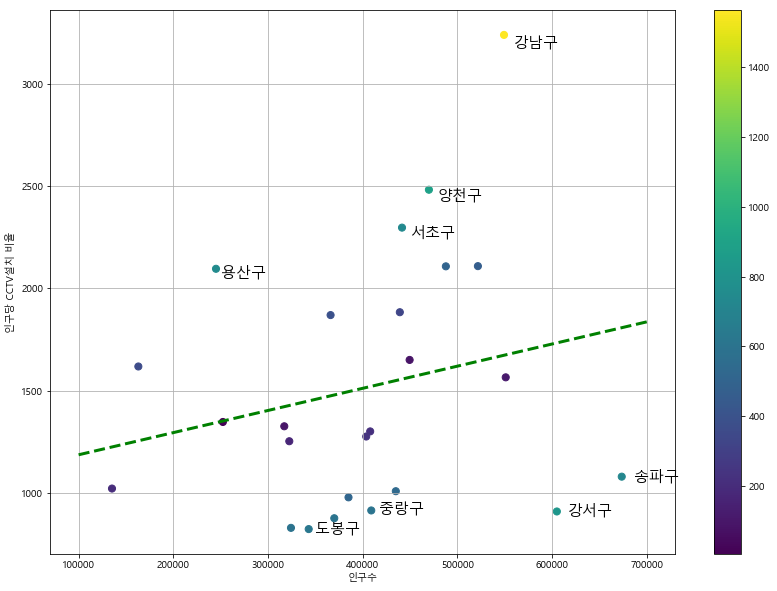

In [49]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(8):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['CCTV수'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당 CCTV설치 비율')
plt.colorbar()
plt.grid()
plt.show()

In [56]:
df_sort.to_csv('data/seoul_population_cctv.csv', sep=',', index=True, encoding='euc-kr') # 구 index를 살리려면 true로, 숫자로 두려면 F